# Beyond the Dashboard: A Deep Dive into the Heart of Vehicle Trends

## Introduction:
In today's automotive landscape, understanding the intricate dynamics that influence vehicle pricing and market trends is crucial for various stakeholders, including manufacturers, dealerships, and consumers. Delving into a comprehensive dataset allows us to uncover valuable insights that drive informed decision-making and strategy developmentscape as a whole.

## Dataset Overview:
- The dataset encapsulates a wealth of information spanning across different facets of vehicles sold within a specified timeframe. It encompasses details such as selling price, mileage, manufacturing year, and various other attributes.
- This dataset is obtained from [kaggle](https://www.kaggle.com/), an amazing platform for data science enthusiasts as it is a treasure house of datasets which are largely varying from each other and every dataset contains wealth of information.
- This project uses a csv file, [cars.csv](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data). 


## Significance of the Project:
- Market Insight: By analyzing this dataset, we can gain deep insights into the factors influencing vehicle pricing and demand, thus empowering stakeholders to make data-driven decisions.

- Consumer Empowerment: Understanding market trends enables consumers to make informed choices, ensuring they get the best value for their investment.

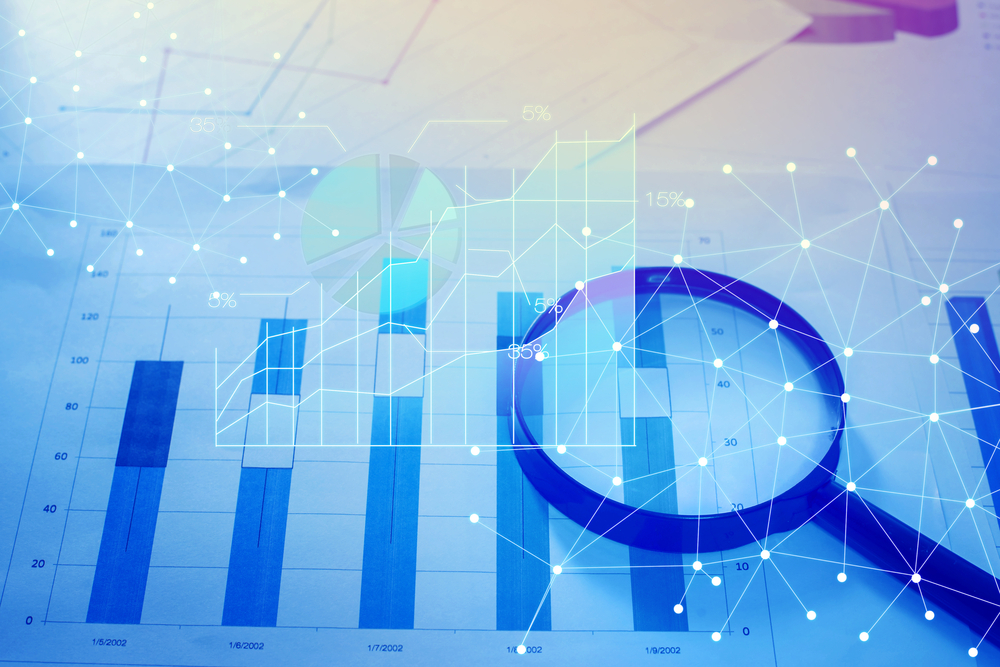!

## Outline:
- Data Loading:
  - Fetch the dataset from Kaggle and load it into the notebook environment.
- Initial Exploration:
  - Examine basic information about the dataset, such as the number of rows and columns, data types, and any missing values.
- Data Cleaning:
  - Preprocess the dataset to handle missing values, remove duplicates, and ensure consistency in data formats.
- Statistical Analysis and Visualization:
  - Perform descriptive statistics on numeric columns to gain insights into central tendency, dispersion, and distribution.
Utilize visualizations, including histograms, box plots, and scatter plots, to explore relationships between different columns and identify patterns or outliers.
- Asking Questions and Drawing Insights:
  - Formulate relevant questions based on the observed relationships and patterns.
Extract insights from the dataset to answer these questions, using both quantitative analysis and visualizations.
- Conclusion and Next Steps:
  - Summarize the key findings and conclusions drawn from the exploratory data analysis.
Discuss potential follow-up steps, such as advanced analysis techniques, feature engineering, or model building, to further explore the dataset and derive actionable insights.

### Importing useful/required libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

### Loading the dataset

In [3]:
raw_vehicle_df=pd.read_csv('car_prices.csv')

In [4]:
#Let's see the dataframe
raw_vehicle_df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


### Initial Exploration

In [5]:
raw_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
raw_vehicle_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


While going through the dataset during the process, I encountered the following  

In [7]:
raw_vehicle_df.transmission.unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

`transmission` column is having 'sedan' and 'Sedan' as it's unique values which shouldn't actually be because according to the data provided `transmission` refers to the type of transmission in the vehicle (e.g., automatic).

 Let's see those rows which have 'sedan' as the transmission column value

In [8]:
wrong_df_1=raw_vehicle_df[raw_vehicle_df.transmission=='sedan']
wrong_df_2=raw_vehicle_df[raw_vehicle_df.transmission=='Sedan']
wrong_df_1.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500


In [9]:
wrong_df_2.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700


We can clearly see that on all those rows which have 'sedan' and 'Sedan' as their `transmission` column, these rows have mismatched values for all their columns starting from body column. before coming to a conclusion let's see the unique values of the column `body`


In [10]:
raw_vehicle_df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

Yes, there are actually mismathced values in some rows

So the issue which might have had occured with the data is that instead of pssing the value 'navigation' to body , it has been stored at the successive column which led to the data error for those rows which have `navigation` as one of their properties. Let's now correct this data set by placing the  values at thier right columns. 
For this, we'll first create a dataframe containing these wrong rows

vehicle_df.shape #This df is an updated one which is free from those rows which had mismatced values 

In [11]:
wrong_df=pd.concat([wrong_df_1,wrong_df_2],axis=0).copy()
wrong_df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500


In [12]:
for i in range(4,len(wrong_df.columns)-1):
    wrong_df[wrong_df.columns[i]]=wrong_df[wrong_df.columns[i+1]]
wrong_df.saledate=None
wrong_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800,None
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900,None
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500,None
499083,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,sedan,automatic,3vwd17aj5fm268964,NaN,2.0,9887,red,black,NaN,13900.0,9900,None
501455,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,sedan,automatic,3vwd17aj6fm231972,NaN,38.0,9837,red,black,NaN,13500.0,12900,None


In [13]:
modified_indices=wrong_df.index
modified_indices

Index([492484, 497008, 497011, 499083, 501455, 505299, 505306, 520461, 528996,
       529009, 529013, 529622, 548784, 551222, 554710, 408161, 417835, 421289,
       424161, 427040, 427043, 434424, 444501, 453794, 461597, 461612],
      dtype='int64')

In [14]:
raw_vehicle_df.loc[modified_indices]=wrong_df;
raw_vehicle_df.transmission.unique()
raw_vehicle_df['saledate'] = pd.to_datetime(raw_vehicle_df['saledate'],utc=True)
# raw_vehicle_df['year'] = raw_vehicle_df.dt.year
raw_vehicle_df['saleyear']=raw_vehicle_df['saledate'].dt.year
raw_vehicle_df['sale_month']=raw_vehicle_df['saledate'].dt.month

C:\Users\DELL\AppData\Local\Temp\ipykernel_12980\1026821341.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['6864' '339' '18384' '9887' '9837' '20379' '20627' '721' '6158' '2817'
 '5705' '18561' '2846' '9562' '5001' '4802' '9410' '1167' '2172' '14872'
 '12655' '15719' '6388' '16633' '11034' '2711']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  raw_vehicle_df.loc[modified_indices]=wrong_df;
C:\Users\DELL\AppData\Local\Temp\ipykernel_12980\1026821341.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['9800' '12900' '13500' '9900' '12900' '13500' '13500' '8500' '13400'
 '12200' '15250' '13100' '7500' '12100' '13600' '16500' '10500' '12700'
 '8250' '14300' '14500' '13500' '10700' '13600' '13000' '14000']' has dtype incompatible with float64, please explicitly cast to a compa

In [15]:
raw_vehicle_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,sale_month
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014.0,12.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014.0,12.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,2015-07-09 00:00:00+00:00,2015.0,7.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 02:30:00+00:00,2015.0,7.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08 02:30:00+00:00,2015.0,7.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-08 23:45:00+00:00,2015.0,7.0


In [16]:
# The above dataframe is free from 

In [17]:
raw_vehicle_df[raw_vehicle_df.year>raw_vehicle_df.saleyear].index

Index([    0,     1,     5,    11,    13,    15,    16,    23,    25,    32,
       ...
       68947, 68948, 68952, 68955, 68986, 69268, 70513, 70515, 73093, 73094],
      dtype='int64', length=201)

The year in the column is the manufacturing year of the cars and the sale year tells the year when the vehicle was sold. Manufacture year coming after sale year is not poosible , so it implies that the dates in these rows are wrong totally and they are not much, almost only 0.03% of the dataset.So let's delete these rows 

In [18]:
raw_vehicle_df.drop(raw_vehicle_df[raw_vehicle_df.year>raw_vehicle_df.saleyear].index,inplace=True)

### VIN is of no use to us, so there wouldn't be any trouble in deleting it. 

In [19]:
raw_vehicle_df.drop('vin',inplace=True, axis=1)


In [20]:
raw_vehicle_df.reset_index(inplace=True)

In [21]:
filtered_df = raw_vehicle_df[(raw_vehicle_df['year'] >= 1982.0) & (raw_vehicle_df['year'] <= 1995.0)]
filtered_df

,index,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,sale_month
5102,5147,1995,Mercedes-Benz,S-Class,S320 LWB,Sedan,automatic,ca,NaN,172358.0,silver,—,ocean auto sales,1125.0,1700.0,2014-12-17 04:30:00+00:00,2014.0,12.0
5105,5150,1995,Mercedes-Benz,E-Class,E320,Sedan,automatic,ca,2.0,241685.0,black,black,newport auto sports,900.0,400.0,2014-12-31 03:30:00+00:00,2014.0,12.0
5116,5161,1995,Buick,Regal,Custom,Sedan,automatic,ca,2.0,111199.0,white,tan,purple heart services inc,650.0,325.0,2014-12-17 05:30:00+00:00,2014.0,12.0
5122,5167,1995,Ford,Mustang,GT,Coupe,manual,ca,2.0,177751.0,blue,beige,rancho ford,700.0,500.0,2015-01-06 05:00:00+00:00,2015.0,1.0
5130,5175,1995,Honda,Accord,LX,Coupe,automatic,ca,1.0,168899.0,gold,beige,purple heart services inc,950.0,400.0,2014-12-17 07:10:00+00:00,2014.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556241,556442,1985,NaN,NaN,NaN,NaN,manual,pa,2.0,28839.0,white,red,remarketing by ge/nextgear capital,4125.0,5100.0,2015-06-18 19:00:00+00:00,2015.0,6.0
556242,556443,1993,Toyota,Camry,DX,Sedan,automatic,tx,3.0,70752.0,beige,tan,autonation honda lewisville,800.0,2000.0,2015-06-17 21:00:00+00:00,2015.0,6.0
557126,557327,1994,Cadillac,Seville,Base,sedan,automatic,fl,2.0,147219.0,blue,—,ed morse auto plaza,750.0,900.0,2015-06-18 01:30:00+00:00,2015.0,6.0
557127,557328,1994,Honda,Civic,LX,sedan,automatic,fl,2.0,208218.0,blue,gray,coggin honda of ft pierce,575.0,350.0,2015-06-17 23:00:00+00:00,2015.0,6.0


There were only 1624 cars sold between the period 1982 and 1995 which is almost only 0.5% of the data but significantly affects the average year and selling prices as these years might witness really less sp compared to the SP from 2005 due to inflation. So it would be really practical to delete these rows.

In [22]:
raw_vehicle_df.drop(raw_vehicle_df[(raw_vehicle_df['year'] >= 1982.0) & (raw_vehicle_df['year'] <= 1995.0)].index,inplace=True)

When we compare the year 2015 with the other years we see that a really less number of cars were sold according to the dataset. It might be possible that 2015 complete year data is not present in our dataset so it would be better to either remove them or replace them with the mean of 2012,2013,2014.
Data Completeness: We suspect that the data for the year 2015 is incomplete or unreliable, so removing it might be a reasonable option, especially since the missing data significantly affects the validity or representativeness of our dataset.


In [26]:
##Removing the data containing 2015 
raw_vehicle_df.drop(raw_vehicle_df[raw_vehicle_df.year==2015].index,inplace=True)
raw_vehicle_df.drop(columns=['index'],inplace=True)

### Before drawing any insight form the data, we have done the following change 
- We have shifted the columns of those rows which were wrongly placed
- there were some rows where the sale year was before the manufacturing year , we dropped those rows.
- we dropped the column VIN, which is ultimately of no use to us.
- we dropped the rows containing year 2015 and years between 1982 and 1995 

In [27]:
#Let's copy the data frame to make any changes 
vehicle_df=raw_vehicle_df.copy()

### Handling null valuees

In [28]:
vehicle_df.head(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,sale_month
0,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015.0,1.0
2,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014.0,12.0
3,2014,BMW,M5,Base,Sedan,automatic,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,2014-12-17 04:30:00+00:00,2014.0,12.0
4,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,2014-12-16 05:00:00+00:00,2014.0,12.0
5,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,2014-12-18 04:00:00+00:00,2014.0,12.0
6,2014,Chevrolet,Camaro,LT,Convertible,automatic,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,2015-01-19 20:00:00+00:00,2015.0,1.0
7,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0,2014-12-16 04:30:00+00:00,2014.0,12.0
9,2014,Chevrolet,Cruze,2LT,Sedan,automatic,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,2014-12-16 04:00:00+00:00,2014.0,12.0
10,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,2014-12-18 04:30:00+00:00,2014.0,12.0
11,2014,Chevrolet,Camaro,LS,Coupe,automatic,ca,17.0,13441.0,black,black,wells fargo dealer services,17750.0,17000.0,2014-12-30 07:00:00+00:00,2014.0,12.0


### Droping duplicate rows 

In [42]:
vehicle_df.drop_duplicates(inplace=True)

In [29]:
vehicle_df.isna().sum()

year                0
make             9897
model            9968
trim            10229
body            12711
transmission    63960
state               0
condition       11645
odometer           93
color             719
interior          719
seller              0
mmr                12
sellingprice       12
saledate           12
saleyear           12
sale_month         12
dtype: int64

In [30]:
for i in range(0,len(raw_vehicle_df.columns)):
    column_name=raw_vehicle_df.columns[i]
    column_unique_ele_count=raw_vehicle_df[raw_vehicle_df.columns[i]].nunique()
    print(column_name," ",column_unique_ele_count)

year   19
make   96
model   923
trim   1878
body   84
transmission   2
state   38
condition   41
odometer   170980
color   20
interior   17
seller   14185
mmr   1100
sellingprice   1856
saledate   3722
saleyear   2
sale_month   8


In [31]:
#replacing the nan values of transmission column with unknown
vehicle_df['transmission'].fillna('unknown', inplace=True)
vehicle_df.transmission.unique() 

C:\Users\DELL\AppData\Local\Temp\ipykernel_12980\2391003319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicle_df['transmission'].fillna('unknown', inplace=True)


array(['automatic', 'unknown', 'manual'], dtype=object)

## Basic information about the dataset

In [33]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547776 entries, 0 to 558635
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          547776 non-null  int64              
 1   make          537879 non-null  object             
 2   model         537808 non-null  object             
 3   trim          537547 non-null  object             
 4   body          535065 non-null  object             
 5   transmission  547776 non-null  object             
 6   state         547776 non-null  object             
 7   condition     536131 non-null  float64            
 8   odometer      547683 non-null  object             
 9   color         547057 non-null  object             
 10  interior      547057 non-null  object             
 11  seller        547776 non-null  object             
 12  mmr           547764 non-null  float64            
 13  sellingprice  547764 non-null  object            

In [70]:
# Converting the sellingprice to numeric column
pd.to_numeric(vehicle_df['sellingprice'], errors='coerce')

0         30000.0
2         67000.0
3         65000.0
4          9800.0
5         32250.0
           ...   
558629    10400.0
558630    22800.0
558632    30800.0
558633    34000.0
558635    26700.0
Name: sellingprice, Length: 547764, dtype: float64

In [73]:
# Drop rows where 'column1' and 'column2' contain null values
vehicle_df.dropna(subset=['mmr','sellingprice','saledate','saleyear','sale_month'], inplace=True)
# Calculate the percentage of null values in each column
null_percentage = (vehicle_df.isnull().sum() / len(vehicle_df)) * 100

# Display the result
print(null_percentage)


year                0.000000
make                1.806800
model               1.819762
trim                1.867410
body                2.320525
transmission        0.000000
state               0.000000
condition           2.125916
odometer            0.016978
color               0.131261
interior            0.131261
seller              0.000000
mmr                 0.000000
sellingprice        0.000000
saledate            0.000000
saleyear            0.000000
sale_month          0.000000
differnce_mmr_sp    0.000000
dtype: float64


In [38]:
vehicle_df.describe()
#year:The manufacturing year of the vehicle
# condition: Condition of the vehicle, possibly rated on a scale
# odometer: The mileage or distance traveled by the vehicle.
# mmr: Possibly indicating the estimated market value of the vehicle.
# The price at which the vehicle was sold.

,year,condition,mmr,saleyear,sale_month
count,547776.000000,536131.000000,547764.000000,547764.000000,547764.000000
mean,2010.002178,30.771440,13587.537425,2014.902841,3.788562
std,3.849195,13.203363,9443.943229,0.296174,3.241189
min,1996.000000,1.000000,25.000000,2014.000000,1.000000
25%,2007.000000,24.000000,7050.000000,2015.000000,1.000000
50%,2012.000000,35.000000,12150.000000,2015.000000,2.000000
75%,2013.000000,41.000000,18050.000000,2015.000000,6.000000
max,2014.000000,49.000000,182000.000000,2015.000000,12.000000


We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.



In [72]:
vehicle_df.sample(4)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,sale_month,differnce_mmr_sp
315357,2012,Ford,Escape,XLT,SUV,automatic,oh,37.0,54908.0,black,black,colonial auto sales,13850.0,13800.0,2015-02-16 17:30:00+00:00,2015.0,2.0,50.0
204492,2005,Chevrolet,Express Cargo,3500,Van,automatic,ca,19.0,82205.0,black,tan,wheels exchange llc,4525.0,3300.0,2015-01-27 20:30:00+00:00,2015.0,1.0,1225.0
19170,2007,Toyota,FJ Cruiser,Base,SUV,automatic,tx,35.0,123381.0,silver,black,desert sun motors inc,13200.0,13000.0,2014-12-18 04:00:00+00:00,2014.0,12.0,200.0
65932,2008,Chevrolet,Impala,LT,Sedan,automatic,pa,36.0,48472.0,red,tan,manheim imports,7475.0,8400.0,2015-01-02 01:00:00+00:00,2015.0,1.0,-925.0


In [48]:
vehicle_df['differnce_mmr_sp']=vehicle_df['mmr']-vehicle_df['sellingprice']
vehicle_df[['differnce_mmr_sp','mmr','sellingprice']]
vehicle_df.differnce_mmr_sp

0         1900.0
2        -1000.0
3         4000.0
4         2100.0
5         -150.0
           ...  
558629    -450.0
558630   -2500.0
558632    -600.0
558633   -4200.0
558635    2900.0
Name: differnce_mmr_sp, Length: 547764, dtype: object

## Exploratory Analysis and Visualization

### Understanding the significance of the column 'condition' 

According to me:
-   The better the condition of the vehicle the more would be it's selling price and vice veersa
-   The more the odometer reading, the more the condition of the vehicle would have detoriated

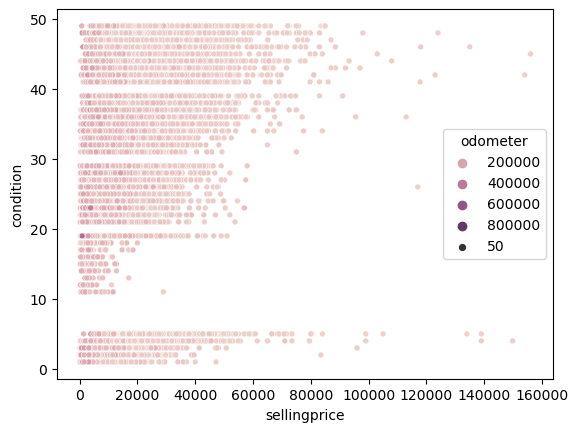

In [39]:
sns.scatterplot(data=vehicle_df[:100000],
    x='sellingprice',
    y='condition',
    hue='odometer',size=50);

clearly, higher the value in the condition column, the more is the selling price

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


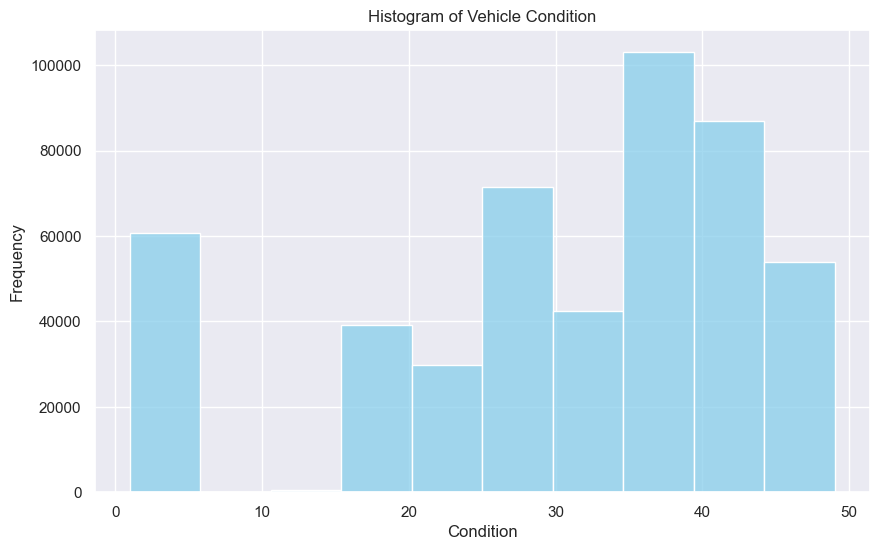

In [40]:
# Set the style of the seaborn plots
sns.set(style="darkgrid")
# Create a histogram for the 'condition' column with 10 bins
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicle_df[:500000], x='condition', bins=10, kde=False, color='skyblue')
plt.title('Histogram of Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


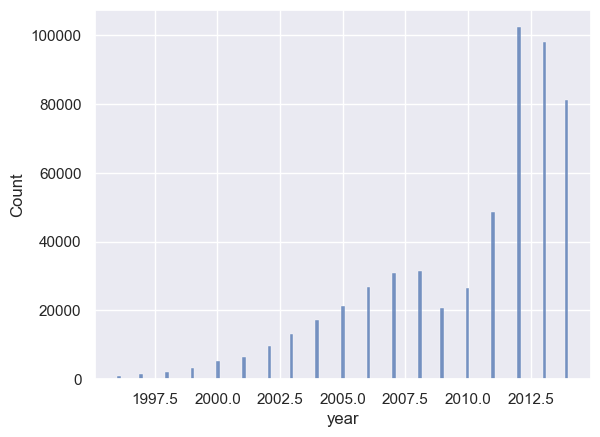

In [47]:
sns.histplot(data=vehicle_df,
    x='year',
);

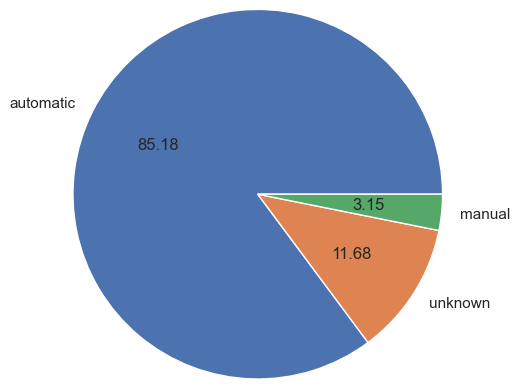

In [68]:
# Transmission distribution
plt.pie(vehicle_df.transmission.value_counts(),labels=vehicle_df.transmission.unique(),autopct="%.2f",radius=1.25);

It appears that the most number of vehicles that were sold are automatic which is about 85% of the entire sales. So it implies that resale of automatic vehicles happen more as compared to manual 

In [49]:
correlation_matrix = vehicle_df[['mmr', 'sellingprice']].corr()
correlation_matrix #correlation matrix is used when we want to simulataneously know the relation between more than two varibles

,mmr,sellingprice
mmr,1.000000,0.983465
sellingprice,0.983465,1.000000


<Axes: xlabel='sellingprice', ylabel='mmr'>

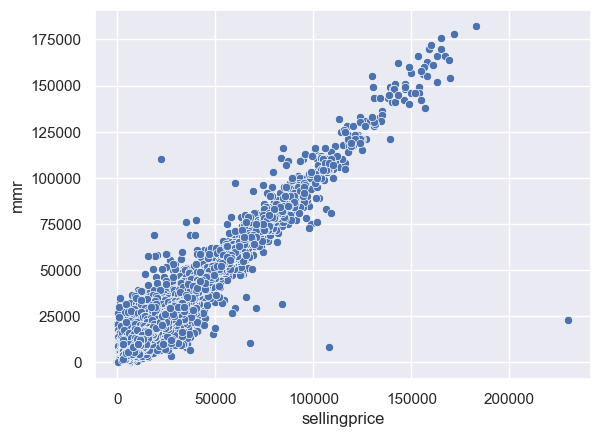

In [77]:
sns.scatterplot(data=vehicle_df,x='sellingprice',y='mmr')

We can conclude from the graph above that these two columns are highly correlated. It implies that the mmr value is highly nearby to selling price

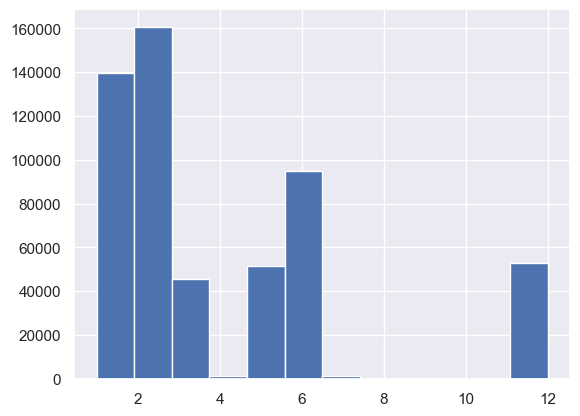

In [51]:
plt.hist(x='sale_month',bins=12,data=vehicle_df);

##### Seasonal Variation:
The observed pattern suggests that there may be seasonal variations in vehicle sales. The peaks in sales during the first two months could indicate higher demand at the beginning of the year, possibly due to factors like tax returns, year-end bonuses, or new model releases. Similarly, increased sales in the 5th, 6th, and 12th months might be influenced by seasonal events or promotions, such as end-of-year sales or holiday discounts.

#### Inventory Management: 
Dealerships may adjust their inventory management strategies based on seasonal demand patterns. Higher sales in certain months could lead to adjustments in inventory levels and pricing strategies to optimize sales and maximize profits.

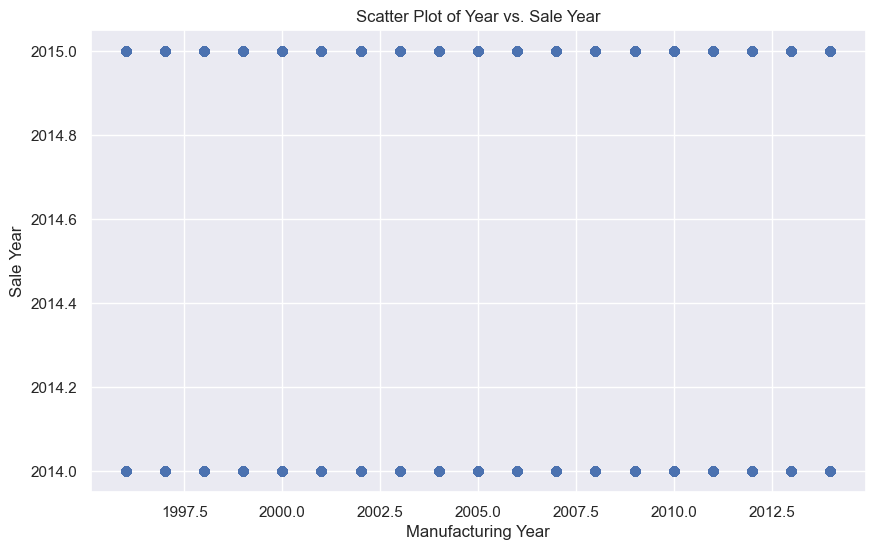

In [52]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vehicle_df['year'], vehicle_df['saleyear'], alpha=0.5)
plt.title('Scatter Plot of Year vs. Sale Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Sale Year')
plt.grid(True)
plt.show()


These are resale dates and thatsy these are shown as manufacturing dates to be on 90s and sales in 2015s

#####  The most preffered combination of body and transmission type 

In [78]:
preferred_combinations = vehicle_df.groupby(['body', 'transmission']).size().reset_index(name='count')
most_preferred_combination = preferred_combinations.loc[preferred_combinations['count'].idxmax()]
# Print the most preferred combination
print("The most preferred combination of body and transmission type:")
print(most_preferred_combination)



The most preferred combination of body and transmission type:
body                Sedan
transmission    automatic
count              171599
Name: 90, dtype: object


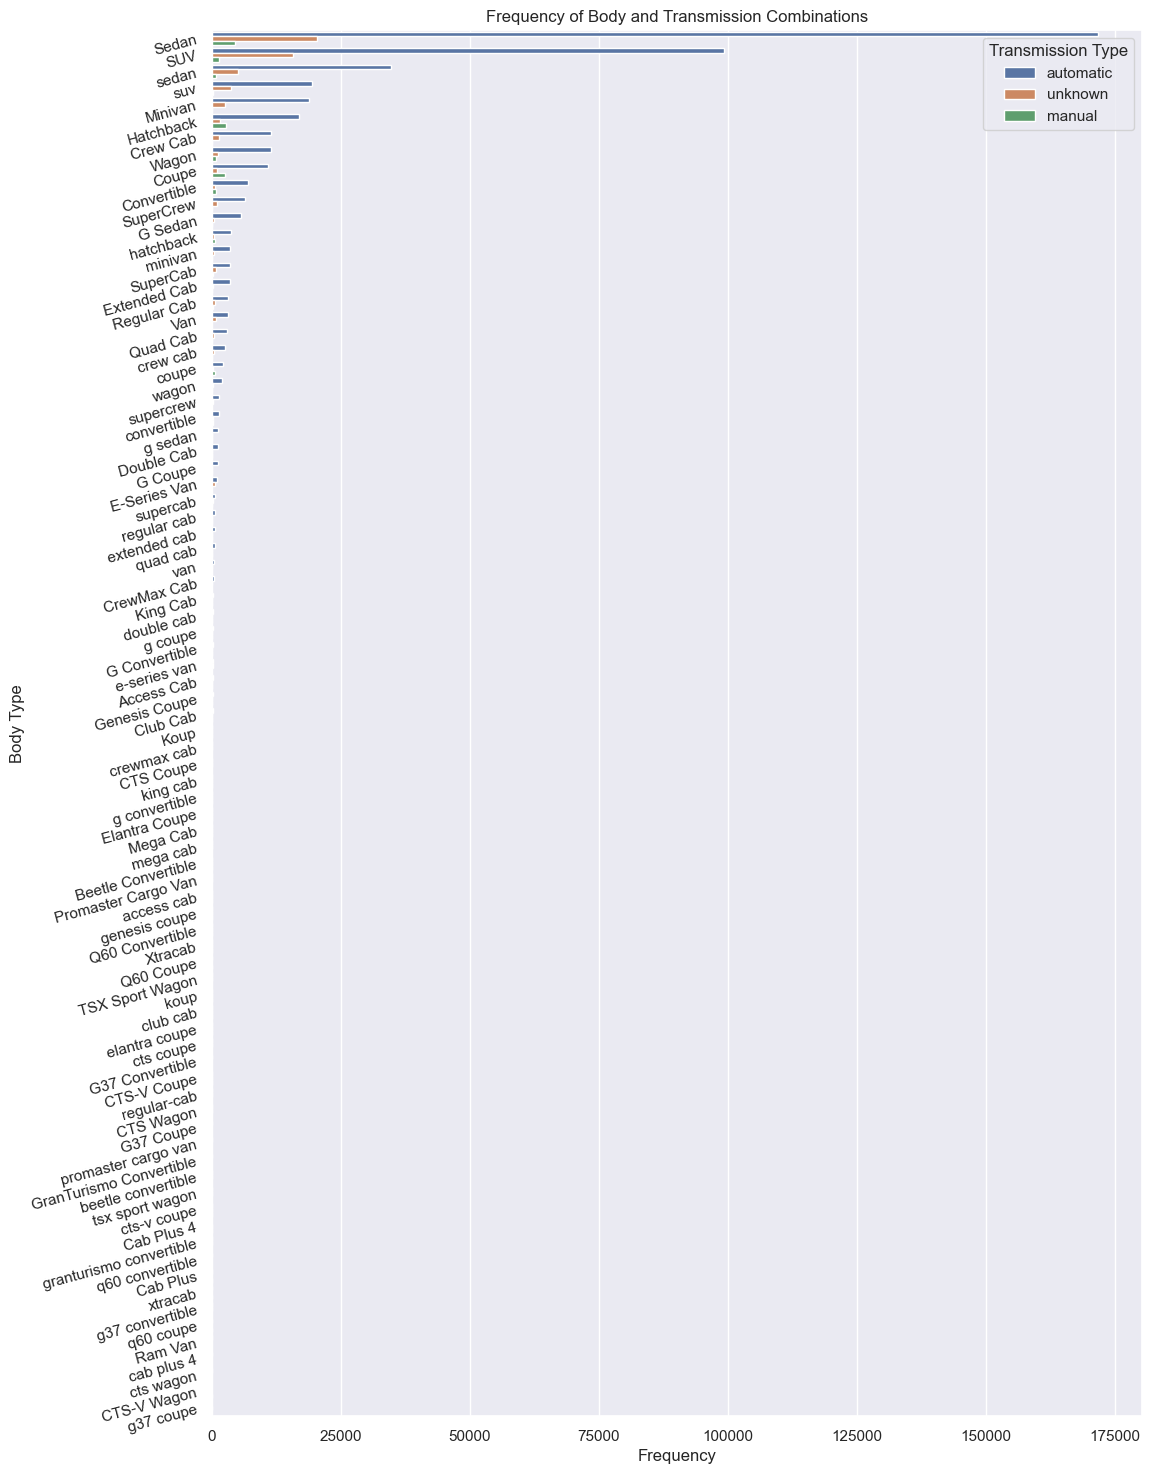

In [54]:
# Group by 'body' and 'transmission' columns and count the frequency of each combination
preferred_combinations = vehicle_df.groupby(['body', 'transmission']).size().reset_index(name='count')

# Sort the combinations by frequency in descending order
preferred_combinations = preferred_combinations.sort_values(by='count', ascending=False)

# Get unique 'body' types
unique_body_types = preferred_combinations['body'].unique()

# Create the bar plot
plt.figure(figsize=(12, 18))
sns.barplot(data=preferred_combinations, x='count', y='body', hue='transmission')
plt.title('Frequency of Body and Transmission Combinations')
plt.xlabel('Frequency')
plt.ylabel('Body Type')

# Tilt the labels of the body type on the y-axis
plt.yticks(range(len(unique_body_types)), unique_body_types, rotation=15)

plt.legend(title='Transmission Type', loc='upper right')
plt.show()


So the most preferred body and transmission type are SUV[autmoatic],Sedan[automatic],SUV[Manual]. it suggests that consumers in that segment prefer the convenience and ease of automatic transmission.

In [55]:
# Group by 'year' and 'make' columns and count the number of entries
vehicles_sold_by_make_and_year = vehicle_df.groupby(['year', 'make']).size().reset_index(name='count')

# Display the result
vehicles_sold_by_make_and_year


,year,make,count
0,1996,Acura,13
1,1996,Audi,1
2,1996,BMW,19
3,1996,Buick,11
4,1996,Cadillac,19
...,...,...,...
972,2014,land rover,1
973,2014,lincoln,17
974,2014,smart,20
975,2014,volkswagen,3


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


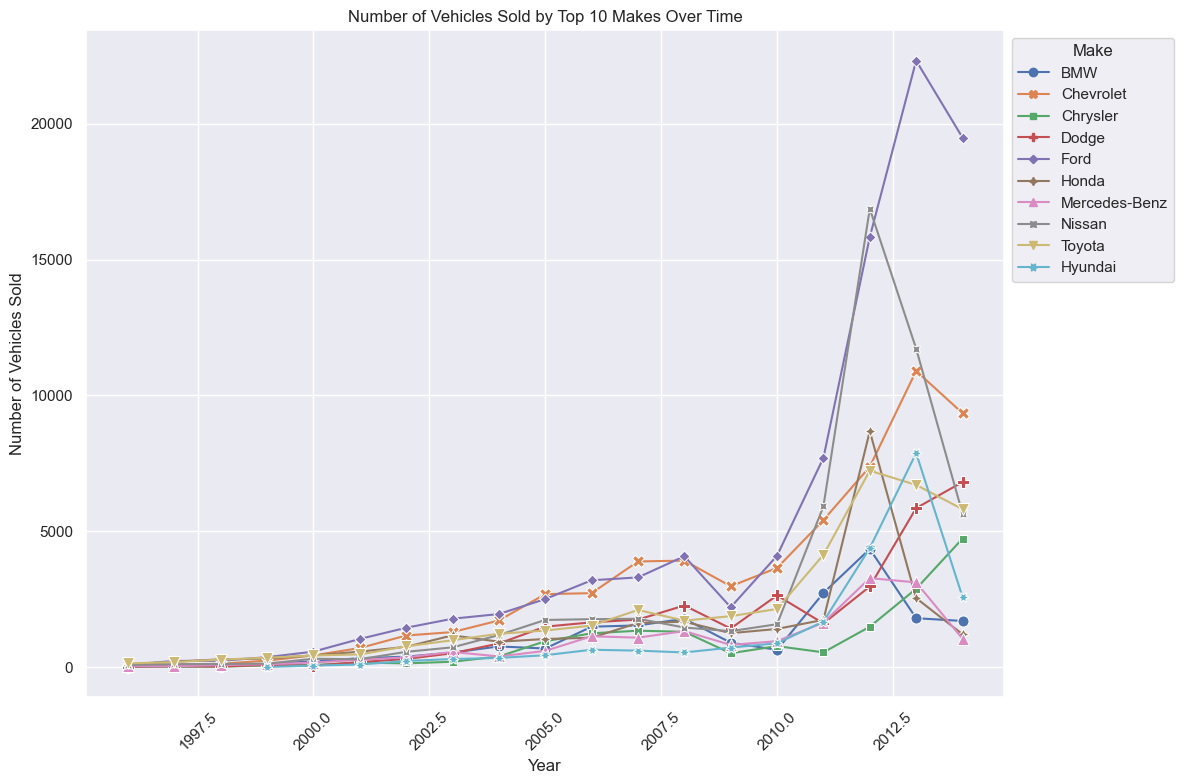

In [57]:
# Calculate the total number of vehicles sold by each make
make_sales_totals = vehicle_df['make'].value_counts()

# Select the top 10 makes based on the total number of vehicles sold
top_10_makes = make_sales_totals.head(10).index

# Filter the DataFrame to include only the top 10 makes
top_10_df = vehicle_df[vehicle_df['make'].isin(top_10_makes)]

# Group by 'year' and 'make' columns and count the number of entries
vehicles_sold_by_make_and_year = top_10_df.groupby(['year', 'make']).size().reset_index(name='count')

# Plot the line plot with hover label
plt.figure(figsize=(12, 8))
sns.lineplot(data=vehicles_sold_by_make_and_year, x='year', y='count', hue='make', style='make', markers=True, dashes=False, markersize=8, errorbar=None)
plt.title('Number of Vehicles Sold by Top 10 Makes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Make', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


The above is a graph showing the growth of top 10 companies(according to vehicles sold) from 1990 to 2015. The graph suggests that Ford was the number of seller followed by Nissan, Chevrolet and Honda 

### What is the demographics for different companies? i.e., which vehicle was sold the most in the different states present in the dataset in the years 2012,2013, and 2014

In [89]:
# Filter data for the years 2012, 2013, and 2014
filtered_data = vehicle_df[(vehicle_df['year'] >= 2012) & (vehicle_df['year'] <= 2014)]

# Group data by state, year, and vehicle make, and count sales
grouped_data = filtered_data.groupby(['state', 'year', 'make']).size().reset_index(name='sales_count')

# Find most sold vehicle for each state in each year
most_sold_vehicles = grouped_data.groupby(['state', 'year']).apply(lambda x: x.loc[x['sales_count'].idxmax()]).reset_index(drop=True)

# Compile results for each year into a DataFrame
result_df = most_sold_vehicles.pivot(index='state', columns='year', values='make')
result_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_12980\307574852.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_sold_vehicles = grouped_data.groupby(['state', 'year']).apply(lambda x: x.loc[x['sales_count'].idxmax()]).reset_index(drop=True)


year,2012,2013,2014
state,,,
ab,Ford,Ford,Chrysler
al,Dodge,Chevrolet,Chevrolet
az,Chevrolet,Chevrolet,Ford
ca,BMW,Ford,Ford
co,Nissan,Ford,Ford
fl,Nissan,Ford,Ford
ga,Nissan,Ford,Ford
hi,Honda,Ford,Ford
il,Nissan,Ford,Ford


### Let's see the selling prices for different transmission types 

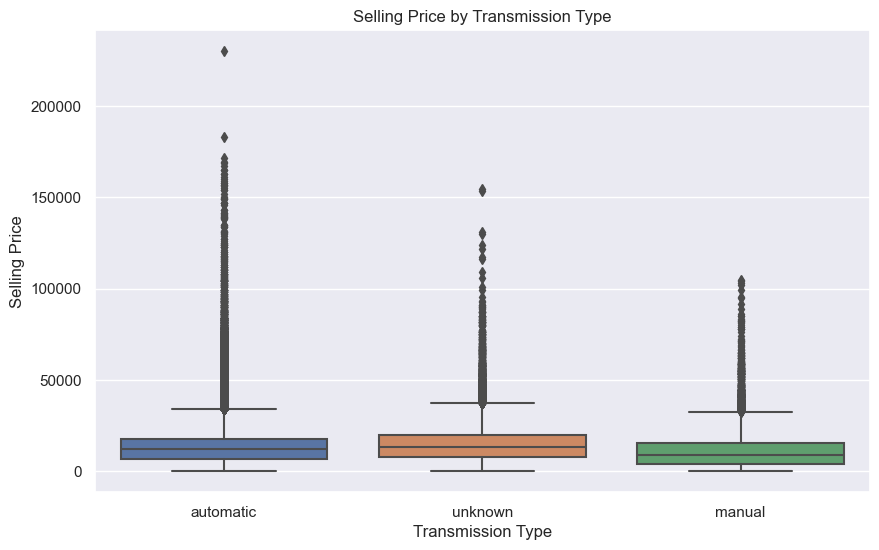

In [58]:
# Create a box plot or violin plot to compare selling prices by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=vehicle_df, x='transmission', y='sellingprice')
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


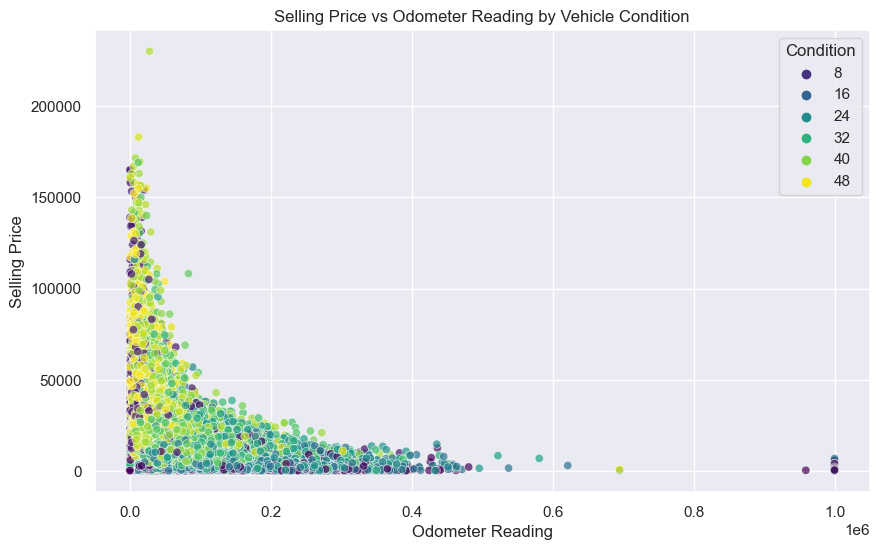

In [59]:
# Create a scatter plot or regression plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicle_df, x='odometer', y='sellingprice', hue='condition', palette='viridis', alpha=0.7)


plt.title('Selling Price vs Odometer Reading by Vehicle Condition')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.legend(title='Condition')
plt.grid(True)
plt.show()


Upon careful observation, it becomes apparent that vehicles with lower odometer readings and a condition rating of 30 or higher tend to command higher selling prices. Conversely, when the odometer reading is higher, the condition rating is predominantly less than 30, resulting in a decrease in the selling price.





<Axes: xlabel='odometer', ylabel='sellingprice'>

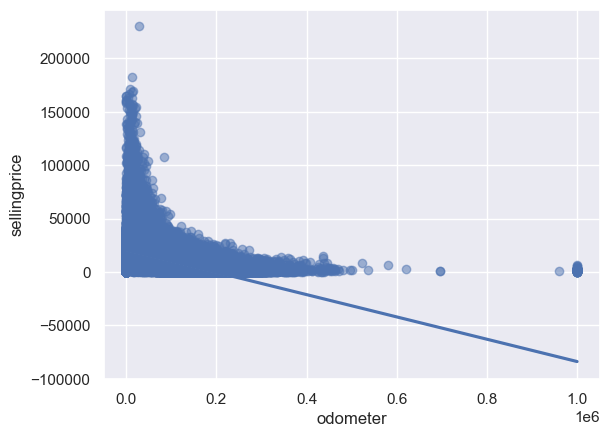

In [92]:
# Alternatively, we can use a regression plot to show the trend
vehicle_df['odometer'] = pd.to_numeric(vehicle_df['odometer'], errors='coerce')
vehicle_df['sellingprice'] = pd.to_numeric(vehicle_df['sellingprice'], errors='coerce')
sns.regplot(data=vehicle_df, x='odometer', y='sellingprice', scatter_kws={'alpha':0.5})

### Preffered Colors in cars

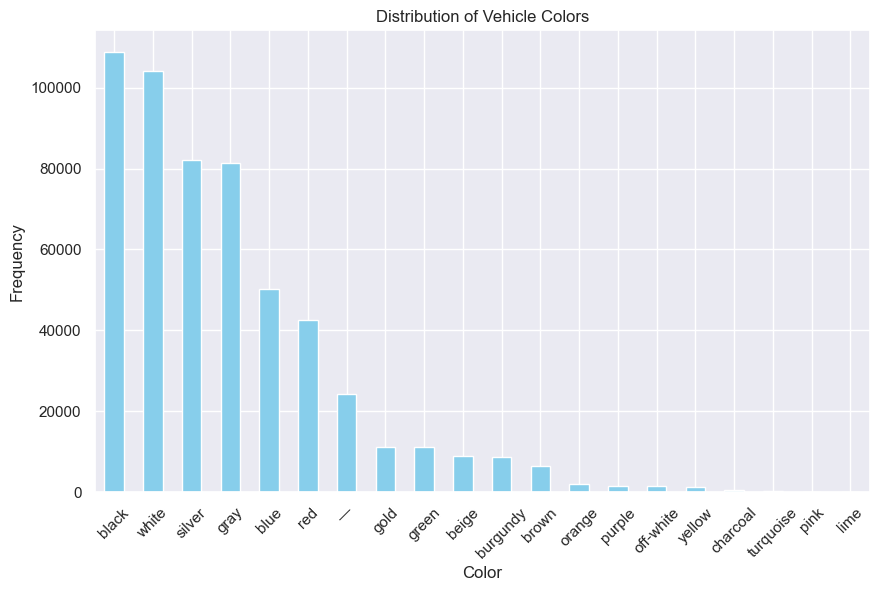

In [61]:
# Count the frequency of vehicle colors
color_counts = vehicle_df['color'].value_counts()

# Plot the distribution of vehicle colors
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Resale Value: Neutral colors like black, white, silver, and gray tend to have higher resale value compared to more unique or unconventional colors. Buyers may choose these colors with the intention of maximizing the resale value of their vehicles in the future.
Popular Color Preferences: Black, white, silver, and gray are widely accepted as neutral colors and are often preferred by car buyers due to their versatility and timeless appeal. The dominance of these colors suggests that they are popular choices among consumers.



In [93]:
# Group the data by body type, color, and interior, and count the frequency of each combination
body_color_interior_counts = vehicle_df.groupby(['body', 'color', 'interior']).size().reset_index(name='count')

# Iterate over each unique body type
unique_bodies = vehicle_df['body'].unique()
preferred_combos = []

for body_type in unique_bodies:
    # Filter the data for the current body type
    body_data = body_color_interior_counts[body_color_interior_counts['body'] == body_type]
    
    # Check if the DataFrame is empty
    if not body_data.empty:
        # Find the most preferred color and interior combo for the current body type
        most_preferred_combo = body_data.loc[body_data['count'].idxmax()]
        preferred_combos.append({
            'Body Type': body_type,
            'Color': most_preferred_combo['color'],
            'Interior': most_preferred_combo['interior'],
            'Frequency': most_preferred_combo['count']
        })
    else:
        # Handle the case when no data is available for the current body type
        print("No data available for body type:", body_type)

# Create a DataFrame to display the results
preferred_combos_df = pd.DataFrame(preferred_combos)

print("Most Preferred Color and Interior Combo for Each Unique Body Type:")
preferred_combos_df[:10]


No data available for body type: nan
Most Preferred Color and Interior Combo for Each Unique Body Type:


,Body Type,Color,Interior,Frequency
0,Sedan,black,black,21852
1,Convertible,black,black,1100
2,SUV,black,black,13542
3,Coupe,black,black,2646
4,Crew Cab,white,gray,1446
5,G Coupe,black,black,364
6,G Sedan,black,black,1235
7,Hatchback,black,black,2223
8,Elantra Coupe,blue,gray,9
9,Genesis Coupe,white,black,40


In [94]:
# Group the data by 'make' and 'model', and count the frequency of each combination
make_model_counts = vehicle_df.groupby(['make', 'model']).size().reset_index(name='count')

# Find the most selling model for each make
most_selling_models = make_model_counts.loc[make_model_counts.groupby('make')['count'].idxmax()]

print("Most Selling Model for Each Make:")
most_selling_models[:10]


Most Selling Model for Each Make:


,make,model,count
8,Acura,TL,2135
15,Aston Martin,V8 Vantage,17
17,Audi,A4,2247
43,BMW,3 Series,8030
71,Bentley,Continental GT,43
80,Buick,LaCrosse,1135
91,Cadillac,CTS,1934
134,Chevrolet,Impala,7736
183,Chrysler,Town and Country,5928
186,Daewoo,Nubira,2


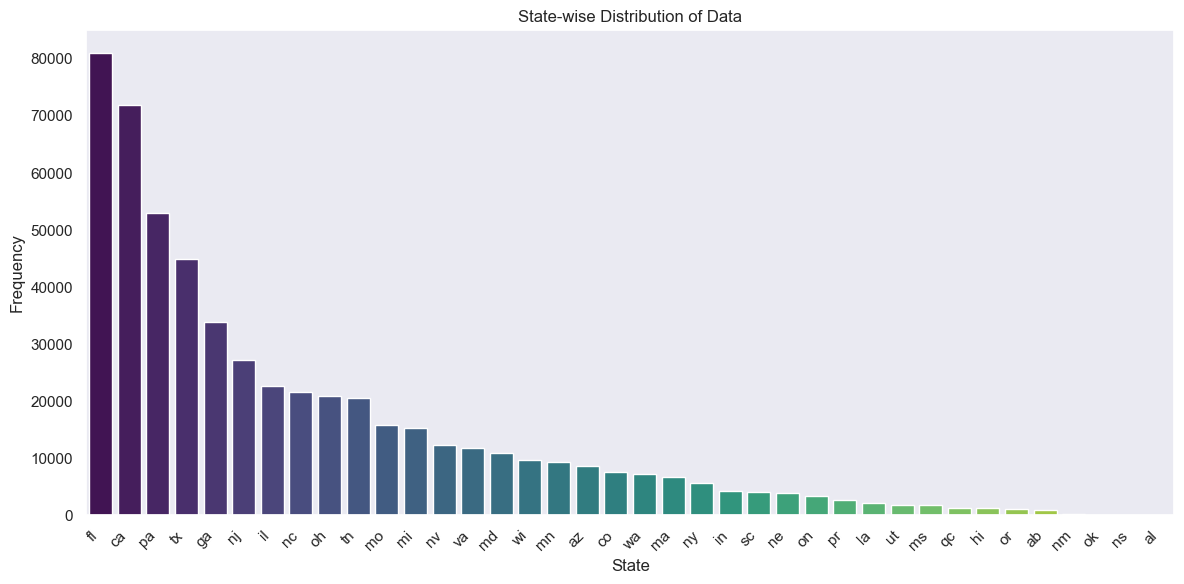

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of observations for each state
state_counts = vehicle_df['state'].value_counts()

# Plot the state-wise distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('State-wise Distribution of Data')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


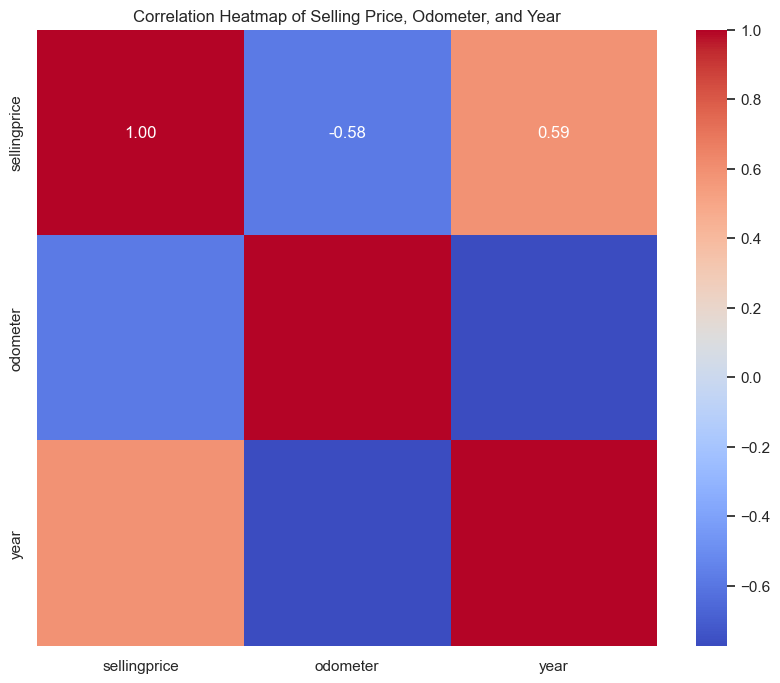

In [69]:
columns_for_heatmap = ['sellingprice', 'odometer', 'year']

# Calculate the correlation matrix
correlation_matrix = vehicle_df[columns_for_heatmap].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selling Price, Odometer, and Year')
plt.show()


### Asking and answering questions 

#### What are the top-selling vehicle models in each state, and how does their popularity change over time?

We can create a DataFrame showing the sales volume for each vehicle model in each state over multiple years, and then visualize the trends using line plots or bar plots.  we'll follow these steps:

 1) Group the data by state and vehicle model.
 2) Count the number of sales for each vehicle model in each state. 3) Find the top-selling vehicle model in each state.
 4) Visualize the popularity of top-selling models over time.



C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

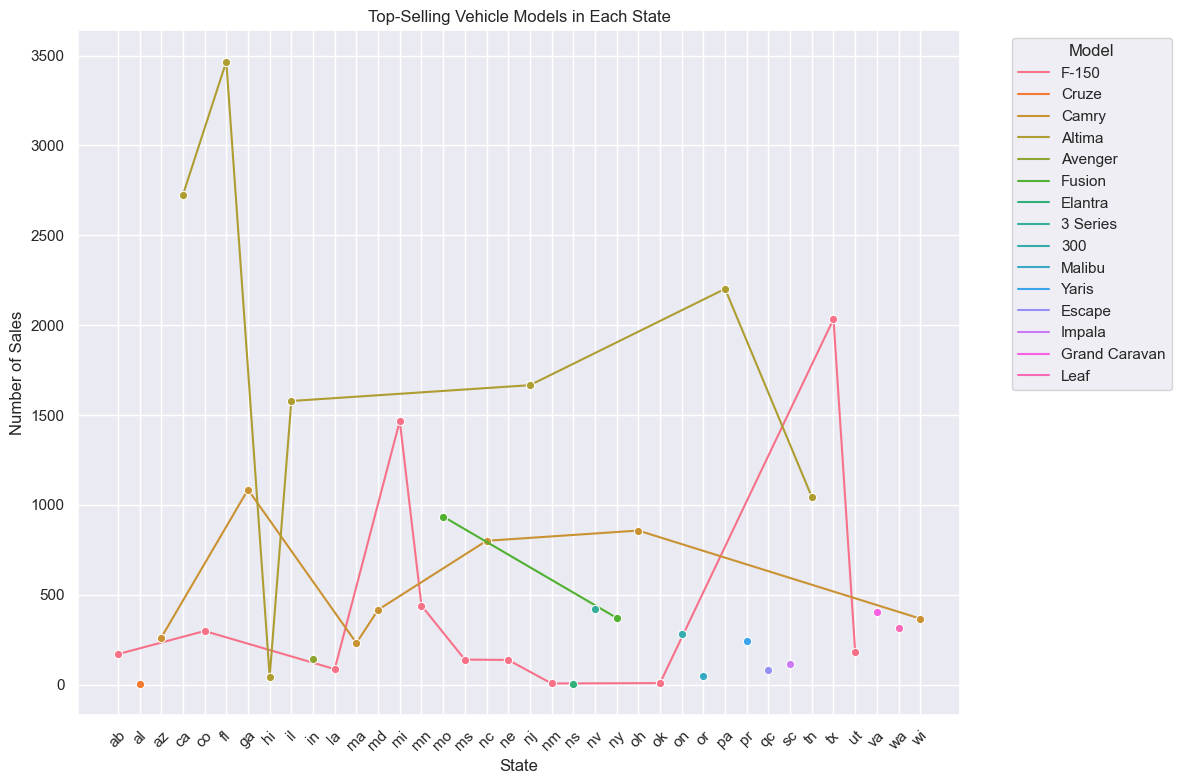

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'vehicle_df' is your DataFrame containing the vehicle data

# Group data by state and vehicle model, count sales
sales_by_state_model = vehicle_df.groupby(['state', 'model']).size().reset_index(name='sales_count')

# Find top-selling vehicle model in each state
top_selling_models = sales_by_state_model.loc[sales_by_state_model.groupby('state')['sales_count'].idxmax()]

# Visualize popularity of top-selling models over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_selling_models, x='state', y='sales_count', hue='model', marker='o')
plt.title('Top-Selling Vehicle Models in Each State')
plt.xlabel('State')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 

#### What is the most preffered color according to selling price

To determine the most preferred color according to selling price.
we'll follow these steps:

 1) Group the data by vehicle color.
 2) Calculate the average selling price for each color.
 3) Identify the color with the highest average selling price.

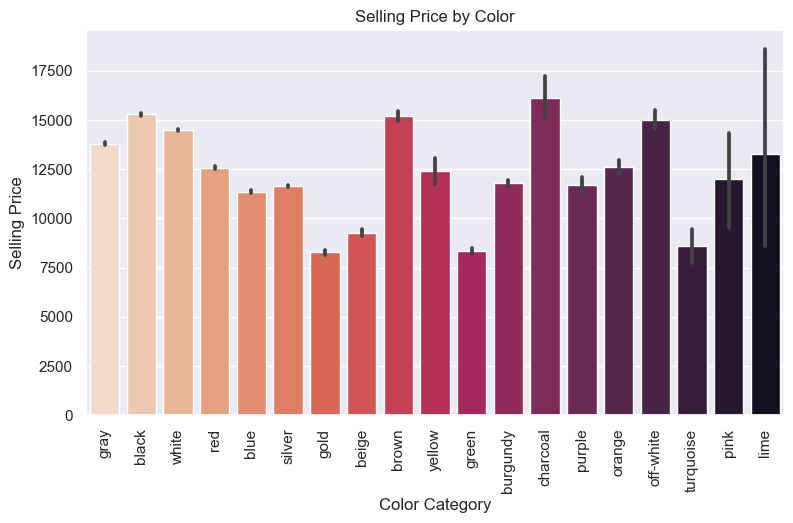

In [98]:
filtered_df = vehicle_df[vehicle_df["color"] != "—"]

palette = "Set3"

plt.figure(figsize=(9, 5))
sns.barplot(
    filtered_df,
    x="color",
    y="sellingprice",
    palette='rocket_r',
)
plt.xlabel("Color Category")
plt.ylabel("Selling Price")
plt.title("Selling Price by Color")

plt.xticks(rotation=90)

plt.show()

The above graph gives the following inferences:

 1) `Charcoal` is the most preffered color when it comes to buying a high end vehicle
 2) neutral colors like gray, black, withstand the same popularity as they did in the `most preffered colors`

#### Question: How do the selling prices vary across the top 10 vehicle body types?

To analyze the distribution of selling prices across the top 10 vehicle body types, we can follow these steps:

 1) Filter the dataset to include only the top 10 body types based on sales count.
 2) Visualize the distribution of selling prices for each of these top 5 body types using box plots.

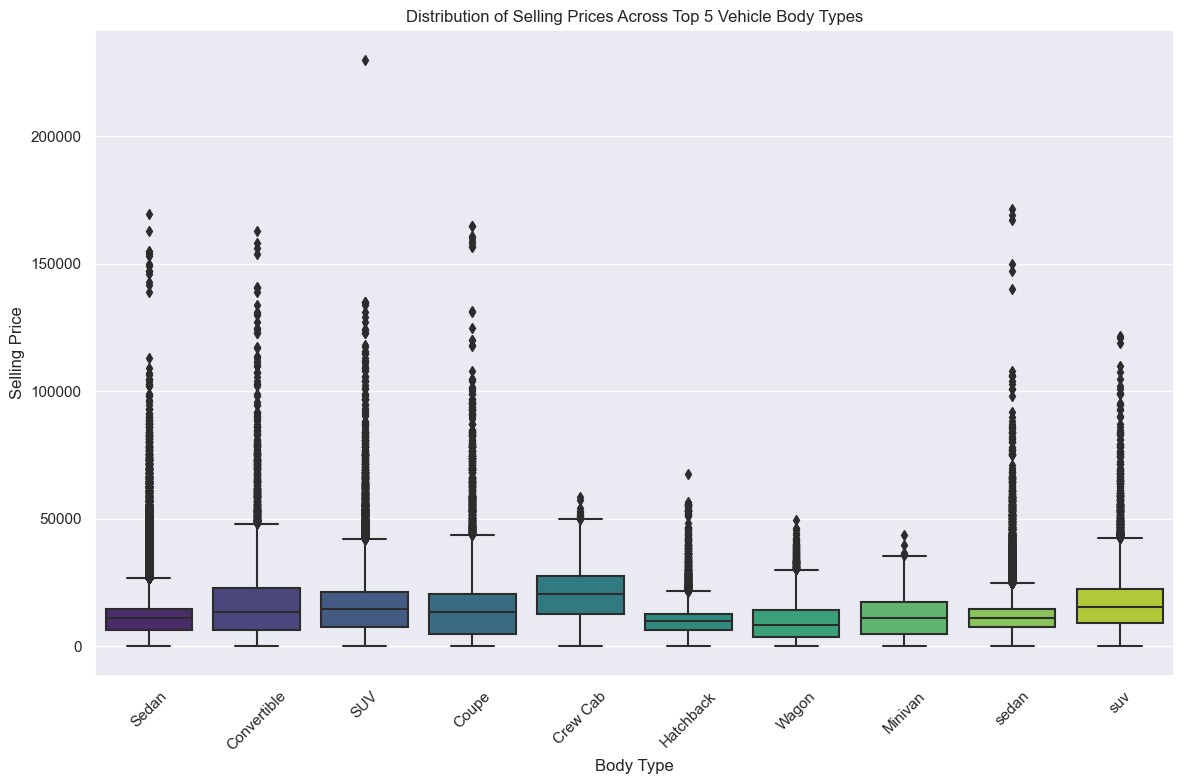

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'vehicle_df' is your DataFrame containing the vehicle data
# Assuming 'top_5_body_types' DataFrame contains the top 5 body types based on sales count

# Get the top 5 body types
top_5_body_types = vehicle_df['body'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the top 5 body types
filtered_data = vehicle_df[vehicle_df['body'].isin(top_5_body_types)]

# Visualize distribution of selling prices for the top 5 body types
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='body', y='sellingprice', palette='viridis')
plt.title('Distribution of Selling Prices Across Top 5 Vehicle Body Types')
plt.xlabel('Body Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analysis:

 1) Crew cab vehicles command the highest average selling price with minimal deviation, appealing to specific consumer segments seeking premium features and larger size.

 2) Convertible cars also boast a high average selling price and limited deviation, reflecting their niche appeal and unique design features contributing to perceived luxury.

 3) Hatchbacks offer a budget-friendly option with a lower average selling price and uniform distribution, appealing to cost-conscious consumers prioritizing practicality.

 4) Sedans exhibit a wide range of selling prices, catering to diverse consumer preferences, including luxury models and customization options driving higher price points.

### Inferences and Conclusions

- The dataset reveals a diverse range of vehicle makes and models sold over the years, indicating a dynamic automotive market.

- Certain vehicle body types, such as crew cab and convertible, command higher average selling prices, suggesting their popularity among buyers seeking premium features and luxury.

- Hatchback vehicles emerge as a budget-friendly option, characterized by lower average selling prices, appealing to cost-conscious consumers prioritizing affordability and practicality.

- Sedan vehicles showcase a wide range of selling prices, indicating a diverse market offering catering to various consumer preferences, including luxury models and customization options.

- The selling prices of vehicles exhibit variation based on factors such as body type, transmission type, and mileage (odometer reading), highlighting the influence of these factors on consumer demand and pricing trends.

- Certain vehicle colors, such as black, white, silver, and gray, dominate the market, indicating their popularity among buyers and potentially influencing resale values.

- The condition of vehicles significantly impacts selling prices, with well-maintained vehicles commanding higher prices compared to those in poorer condition.

- The year of manufacture also influences selling prices, with newer vehicles generally fetching higher prices due to factors such as technological advancements and improved features.

- Regional preferences and market dynamics play a role in determining vehicle sales patterns, with variations observed in sales volume and pricing trends across different states.

- Overall, the dataset provides valuable insights into the automotive industry, enabling stakeholders to make informed decisions regarding pricing strategies, inventory management, and consumer targeting.








### References

 1) Jovian platform:[https://jovian.com/learn/data-analysis-with-python-zero-to-pandas]
 2) kaggle site:[https://www.kaggle.com/datasets]